In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

In [4]:
df=pd.read_csv("data.csv")
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  
0      2.99     4.80        0  
1      5.05    12.00        0  
2      1.04     1.89        0  
3      1.75     7.56        0  
4      0.76     5.96        1

In [5]:
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  
0      2.99     4.80        0  
1      5.05    12.00        0  
2      1.04     1.89        0  
3      1.75     7.56        0  
4      0.76     5.96        1

In [6]:
df["default"].value_counts()

0    952
1    548
Name: default, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   branch    1500 non-null   int64  
 1   ncust     1500 non-null   int64  
 2   customer  1500 non-null   int64  
 3   age       1500 non-null   int64  
 4   ed        1500 non-null   int64  
 5   employ    1500 non-null   int64  
 6   address   1500 non-null   int64  
 7   income    1500 non-null   int64  
 8   debtinc   1500 non-null   float64
 9   creddebt  1500 non-null   float64
 10  othdebt   1500 non-null   float64
 11  default   1500 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 140.8 KB


In [8]:
df.dtypes

branch        int64
ncust         int64
customer      int64
age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default       int64
dtype: object

In [9]:
df["total_debt"]=df["creddebt"]+df["othdebt"]

In [10]:
df.shape

(1500, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   branch      1500 non-null   int64  
 1   ncust       1500 non-null   int64  
 2   customer    1500 non-null   int64  
 3   age         1500 non-null   int64  
 4   ed          1500 non-null   int64  
 5   employ      1500 non-null   int64  
 6   address     1500 non-null   int64  
 7   income      1500 non-null   int64  
 8   debtinc     1500 non-null   float64
 9   creddebt    1500 non-null   float64
 10  othdebt     1500 non-null   float64
 11  default     1500 non-null   int64  
 12  total_debt  1500 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 152.5 KB


In [13]:
df.corr()["default"]

branch        0.031757
ncust         0.013943
customer      0.031392
age          -0.287834
ed            0.080681
employ       -0.293524
address      -0.269841
income       -0.092872
debtinc       0.366074
creddebt      0.187248
othdebt       0.090167
default       1.000000
total_debt    0.135218
Name: default, dtype: float64

In [109]:
def get_score(df1):
    X=df1.loc[:,df1.columns!="default"]
    Y=df1.loc[:,df1.columns=="default"]
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8)
    model=LogisticRegression()
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    confusionmatrix=confusion_matrix(Y_test,y_pred)
    print(confusionmatrix)
    print(model.score(X_test,Y_test))
    print("F1 Score",f1_score(Y_test,y_pred))
    

In [14]:
import seaborn as sns

<AxesSubplot:>

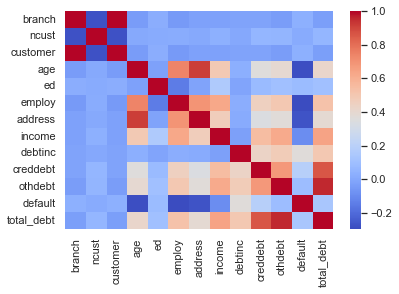

In [15]:
sns.heatmap(df.corr(),  cmap="coolwarm")

In [65]:
import matplotlib.pyplot as plt

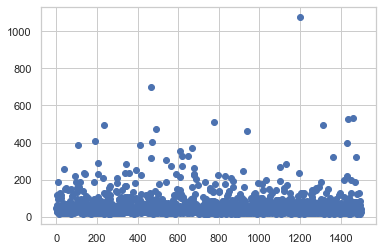

In [67]:
plt.plot(df["income"],"bo")

In [105]:
df1=df[df["income"]<=600]

In [110]:
df1=df.loc[:,["age","employ","address","income","total_debt","default"]]
get_score(df1)
    
    
    
    
    

[[156  35]
 [ 49  60]]
0.72
F1 Score 0.588235294117647


/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  total_debt  
0      2.99     4.80        0        7.79  
1      5.05    12.00        0       17.05  
2      1.04     1.89        0        2.93  
3      1.75     7.56        0        9.31  
4      0.76     5.96        1        6.72

In [181]:
df1=df.loc[:,["age","employ","address","income","debtinc","total_debt","default"]]


In [182]:
df1.head()

age  employ  address  income  debtinc  total_debt  default
0   28       7        2      44     17.7        7.79        0
1   64      34       17     116     14.7       17.05        0
2   40      20       12      61      4.8        2.93        0
3   30      11        3      27     34.5        9.31        0
4   25       2        2      30     22.4        6.72        1

In [183]:
X=df1.loc[:,df1.columns!="default"]
Y=df1.loc[:,df1.columns=="default"]

In [184]:
X.head()

age  employ  address  income  debtinc  total_debt
0   28       7        2      44     17.7        7.79
1   64      34       17     116     14.7       17.05
2   40      20       12      61      4.8        2.93
3   30      11        3      27     34.5        9.31
4   25       2        2      30     22.4        6.72

In [185]:
Y.head()

default
0        0
1        0
2        0
3        0
4        1

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8)



In [188]:
X_train.shape

(1200, 6)

In [189]:
1500*0.8

1200.0

In [190]:
model=LogisticRegression(max_iter=150)

In [191]:
model.fit(X_train,Y_train)

/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=150)

In [192]:
y_pred=model.predict(X_test)

In [193]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [194]:
from sklearn.metrics import confusion_matrix

In [195]:
confusionmatrix=confusion_matrix(Y_test,y_pred)

In [196]:
confusionmatrix

array([[159,  31],
       [ 40,  70]])

In [197]:
model.score(X_test,Y_test)

0.7633333333333333

In [102]:
[146,  43],
       [ 70,  41]

IndentationError: unexpected indent (2340380920.py, line 2)

In [129]:
model.coef_

array([[-0.02859367, -0.19698716, -0.01954886,  0.00082174,  0.10488805,
         0.13740783]])

In [62]:
model.n_features_in_

5

In [63]:
from sklearn.metrics import f1_score

In [108]:
f1_score(Y_test,y_pred)

0.6368159203980099

In [4]:
df["ed"].value_counts()

2    527
3    333
4    310
1    246
5     84
Name: ed, dtype: int64

In [5]:
def plot_scatter(a,b):
    plt.scatter(df[a], df[b])
    plt.show()

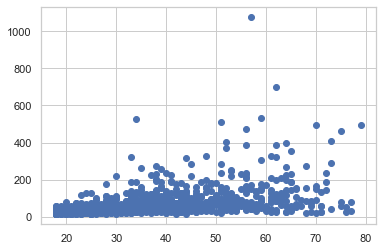

In [6]:
plot_scatter("age","income")

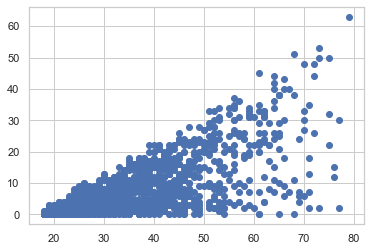

In [7]:
plot_scatter("age","employ")

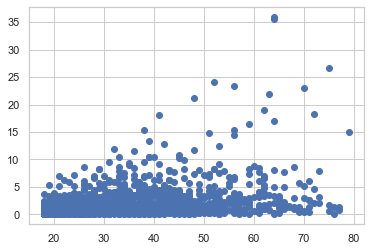

In [8]:
plot_scatter("age","creddebt")

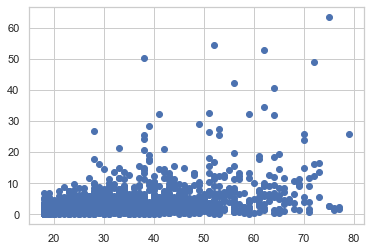

In [9]:
plot_scatter("age","othdebt")

In [10]:
df=df[df["income"]<1000]

In [11]:
df.shape

(1499, 12)

In [12]:
df=df[df["creddebt"]<35]

In [13]:
df.shape

(1497, 12)

In [14]:
df["age"].value_counts()

18    71
19    69
23    65
20    63
30    60
26    58
25    56
24    54
28    51
21    49
22    47
33    46
27    45
29    45
34    45
37    37
32    36
39    33
35    33
31    33
36    32
40    32
38    31
41    30
42    29
43    29
46    25
45    23
47    20
44    18
52    17
51    17
53    16
49    15
56    15
48    13
61    12
62    11
59    11
54    10
65     9
50     9
64     8
57     7
58     7
55     7
66     6
63     5
70     5
71     5
69     4
68     4
72     3
73     3
60     3
75     3
76     2
77     2
67     2
79     1
Name: age, dtype: int64

In [15]:
df["default"].value_counts()

0    951
1    546
Name: default, dtype: int64

In [16]:
df=df.dropna()

In [17]:
df.shape

(1497, 12)

In [18]:
df=df.astype({'default':int})


In [19]:
df['default'].value_counts()

0    951
1    546
Name: default, dtype: int64

In [20]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   branch    1497 non-null   int64  
 1   ncust     1497 non-null   int64  
 2   customer  1497 non-null   int64  
 3   age       1497 non-null   int64  
 4   ed        1497 non-null   int64  
 5   employ    1497 non-null   int64  
 6   address   1497 non-null   int64  
 7   income    1497 non-null   int64  
 8   debtinc   1497 non-null   float64
 9   creddebt  1497 non-null   float64
 10  othdebt   1497 non-null   float64
 11  default   1497 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 152.0 KB


In [21]:
df['sum_debts']=df['debtinc']+df['creddebt']+df['othdebt']

In [22]:
df.head(2)

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   

   creddebt  othdebt  default  sum_debts  
0      2.99      4.8        0      25.49  
1      5.05     12.0        0      31.75

In [23]:
df['avg_debts']=df['sum_debts']/3

In [24]:
df.head(2)

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   

   creddebt  othdebt  default  sum_debts  avg_debts  
0      2.99      4.8        0      25.49   8.496667  
1      5.05     12.0        0      31.75  10.583333

In [25]:
df['debt_income']=df['sum_debts']/df['income']

In [26]:
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  sum_debts  avg_debts  debt_income  
0      2.99     4.80        0      25.49   8.496667     0.579318  
1      5.05    12.00        0      31.75  10.583333     0.273707  
2      1.04     1.89        0       7.73   2.576667     0.126721  
3      1.75     7.56        0      43.81  14.603333     1.622593  
4      0.76     5.96        1      29.12   9.706667     0.970667

In [27]:
df['avg_debt_income']=df['avg_debts']/df['income']

In [28]:
df['debt_ed']=df['sum_debts']/df['ed']

In [29]:
df[df['ed']<0]

Empty DataFrame
Columns: [branch, ncust, customer, age, ed, employ, address, income, debtinc, creddebt, othdebt, default, sum_debts, avg_debts, debt_income, avg_debt_income, debt_ed]
Index: []

In [30]:
df['avg_debt_ed']=df['avg_debts']/df['ed']

In [31]:
df['sum_debtinc_creddebt']=df['debtinc']+df['creddebt']

In [32]:
df['avg_debtinc_creddebt']=df['sum_debtinc_creddebt']/2

In [33]:
df.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'sum_debts',
       'avg_debts', 'debt_income', 'avg_debt_income', 'debt_ed', 'avg_debt_ed',
       'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

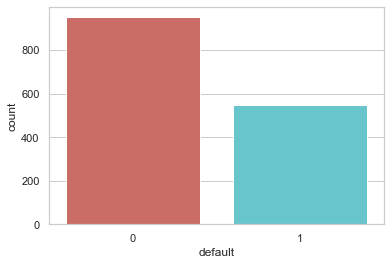

In [34]:
sns.countplot(x='default',data=df, palette='hls')
plt.show()

In [35]:
df.groupby('default').mean()

branch        ncust       customer        age        ed    employ  \
default                                                                         
0        51.502629  3469.835962  254267.552050  37.022082  2.566772  8.927445   
1        53.351648  3493.435897  263404.998168  29.062271  2.761905  3.384615   

          address     income    debtinc  creddebt   othdebt  sum_debts  \
default                                                                  
0        7.526814  63.250263   8.083912  1.512093  3.469432  13.065436   
1        4.097070  50.419414  13.105678  2.547473  4.361392  20.014542   

         avg_debts  debt_income  avg_debt_income   debt_ed  avg_debt_ed  \
default                                                                   
0         4.355145     0.284699         0.094900  6.602676     2.200892   
1         6.671514     0.507056         0.169019  8.600298     2.866766   

         sum_debtinc_creddebt  avg_debtinc_creddebt  
default                                              
0                    9.596004              4.798002  
1                   15.653150              7.826575

In [36]:
df.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'sum_debts',
       'avg_debts', 'debt_income', 'avg_debt_income', 'debt_ed', 'avg_debt_ed',
       'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

In [37]:
X = df.loc[:, df.columns != 'default']
y = df.loc[:, df.columns == 'default']

In [38]:
X.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'sum_debts', 'avg_debts',
       'debt_income', 'avg_debt_income', 'debt_ed', 'avg_debt_ed',
       'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [40]:
0.12*1500

180.0

In [41]:
y_pred = logreg.predict(X_test)
print(logreg.score(X_test,y_test))
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

0.76


In [42]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[162  27]
 [ 45  66]]
